In [ ]:
#import necessary packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix            #run this
from sklearn.datasets import load_digits
import pandas as pd
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog
from skimage import exposure


data shape: (1797, 64)
target shape: (1797,)
images shape: (1797, 8, 8)


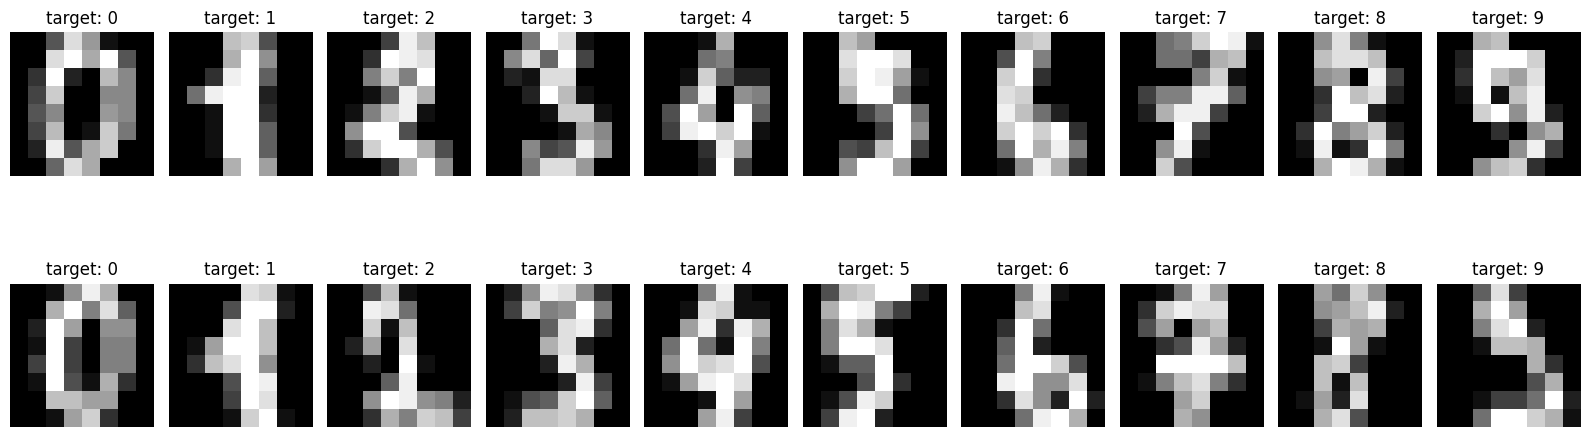

In [ ]:
#___data visualization of MNIST dataset_____

mnist = load_digits()
type(mnist)
print("data shape:",mnist.data.shape)
print("target shape:",mnist.target.shape)
print("images shape:",mnist.images.shape)
# mnist.keys()
# pd.DataFrame(mnist.data).head()
# pd.DataFrame(mnist.target).head()                                    #run this
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [ ]:
# Manual test_train_split

def fetch_data(test_size=10000, randomize=False, standardize=True):
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    if randomize:
        random_state = check_random_state(0)
        permutation = random_state.permutation(X.shape[0])
        X = X[permutation]
        y = y[permutation]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=True)

    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test

if __name__ == '__main__':
    x_train, y_train, x_test, y_test = fetch_data()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:

# Grid_Search block to find the best K value


# Load the MNIST dataset  using keras
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
#-------------------------------------------------------------------------------------
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Define the parameter grid for Grid Search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(x_train_flat, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)                   #DONT RUN THIS

# Get the best KNN model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_knn_model.predict(x_test_flat)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print other evaluation metrics or visualize the results
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 3}
Accuracy: 0.9452


In [ ]:
# # Load the MNIST dataset  using keras
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# ----------------------------------------------------------------

#________train KNN MODEL______________
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# Normalize pixel values to get it between 1 & 0
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0
# Create a KNN model                                             #RUN THIS
knn_model = KNeighborsClassifier(n_neighbors=3)
# Train the KNN model
knn_model.fit(x_train_flat, y_train)
y_pred = knn_model.predict(x_test_flat)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print other evaluation metrics or visualize the results
# print(classification_report(y_test, y_pred)) #classification_report=precision, recall, F1-score
# print(confusion_matrix(y_test, y_pred))  #confusion_matrix=TP,TN,FP,FN
#knn=> flatten the image, noramlize, distance btw 2 points in feature scale,

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Accuracy: 0.9705


In [ ]:
# #___use HOG to extract features_______

# # Load the MNIST dataset using keras
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Function to extract HOG features from an image
# def extract_hog_features(images):
#     hog_features = []
#     for img in images:
#         # Calculate HOG features and their visualization
#         features, hog_image = hog(img, pixels_per_cell=(2, 2), block_norm='L2-Hys', visualize=True)
#         hog_features.append(features)
#     return hog_features

# # Extract HOG features for training and testing images
# x_train_hog = extract_hog_features(x_train)
# x_test_hog = extract_hog_features(x_test)

# # Create a KNN model
# knn_model = KNeighborsClassifier(n_neighbors=3)

# # Train the KNN model                                       # This is under construction
# knn_model.fit(x_train_hog, y_train)

# # Predict using the trained model
# y_pred = knn_model.predict(x_test_hog)

# # Print the accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Optionally, print other evaluation metrics or visualize the results
# # print(classification_report(y_test, y_pred))
# # print(confusion_matrix(y_test, y_pred))


In [ ]:
#___MKAE A DIRECTORY TO STORE INPUT IMAGES_____
def mkdir(dirname):
    try:
        os.mkdir(dirname)                              #RUN THIS ONCE
        print('made', dirname)
    except FileExistsError:
        print(dirname, 'exists')
mkdir('digits')

made digits


In [ ]:
# def preprocess_image(img):
#     # Resize the image to the expected size (28x28)
#     img = cv2.resize(img, (28, 28))

#     # Convert to grayscale if not already
#     if len(img.shape) == 3 and img.shape[2] == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Apply Gaussian Blur to reduce noise
#     img = cv2.GaussianBlur(img, (3, 3), 0)

#     # Apply Bilateral Filter for edge-preserving smoothing
#     img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

#     # Apply Adaptive Thresholding for better boundary detection
#     img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#     # Apply Dilation to enhance features (optional based on your needs)
#     kernel = np.ones((2, 2), np.uint8)
#     img = cv2.dilate(img, kernel, iterations=1)

#     # Invert the image if needed (depends on your requirement)
#     img = np.invert(img)

#     return img

In [ ]:
def preprocess_image(img):
    # Resize the image to the expected size (28x28)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    # Convert to grayscale if not already
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to reduce noise while preserving edges
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Apply Canny Edge Detection
    edges = cv2.Canny(img, 50, 100)  # Adjust thresholds as needed
    # Optionally, apply dilation to enhance the edges
    kernel = np.ones((2, 2), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    # Invert the image if needed (depends on your requirement)
    img = np.invert(img)
    return edges

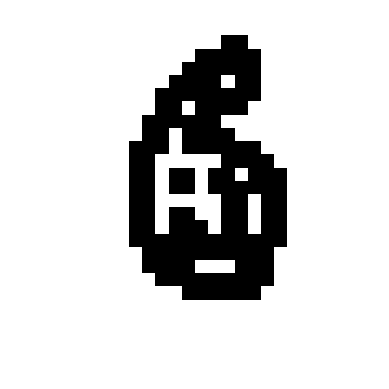

This is probably a 6


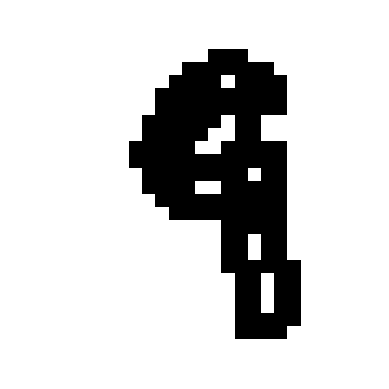

This is probably a 9


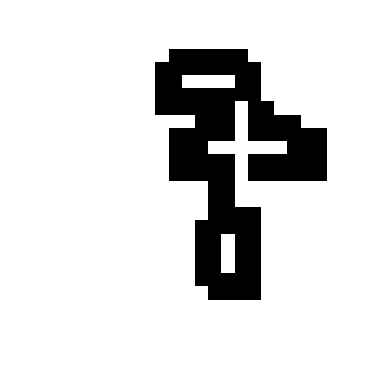

This is probably a 1


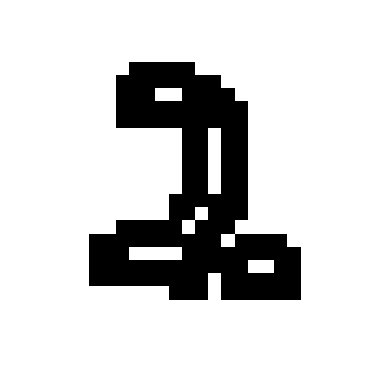

This is probably a 2


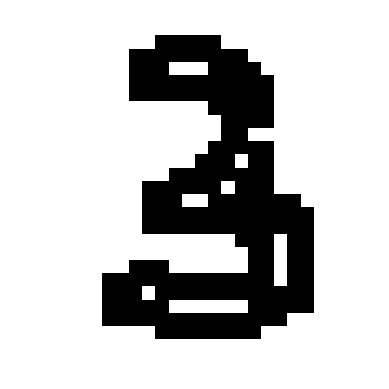

This is probably a 3


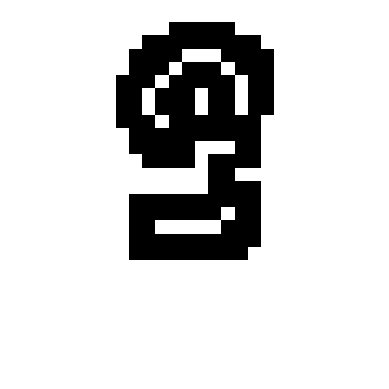

This is probably a 4


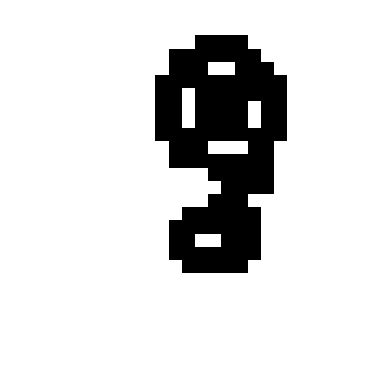

This is probably a 7


In [ ]:
#___MAIN___

image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:, :, 0]

        # Check if img is None (image not loaded successfully)
        if img is None:
            print(f"Error: Unable to load image {image_number}")
            image_number += 1
            continue                                                    #run this

        # Resize the image to match the expected size (28x28)
        # img = cv2.resize(img, (28, 28))
        # #preprocessing
        # # Apply image dilation
        # kernel = np.ones((3, 3), np.uint8)
        # img = cv2.erode(img, kernel, iterations=1)
        # img = np.invert(np.array([img]))

        img = preprocess_image(img)
        # Check the shape of the image
        if img.shape != (28, 28):
            print(f"Error: Image shape is {img.shape}. Expected (28, 28).")
            image_number += 1
            continue

        # Display the processed image
        plt.imshow(img, cmap=plt.cm.binary)
        plt.axis('off')  # Hide axis
        plt.show()


        # plt.imshow(img[0], cmap=plt.cm.binary)
        # plt.show()
        # features = extract_features(img)


        img_flat = img.flatten() / 255.0  # Flatten and normalize the image
        prediction = knn_model.predict([img_flat])
        print(f"This is probably a {prediction[0]}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1